In [1]:
import warnings
import intake
import xarray as xr 
import proplot as plot 
import matplotlib.pyplot as plt 

from esmtools.stats import*

warnings.filterwarnings('ignore')

/Users/monsoon/miniconda3/envs/pyaos/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]


In [16]:
url = '/Users/monsoon/Desktop/may-2020/data/PD/PRECIP.ymonmean.0121-0140.nc'

In [17]:
! ncdump -h /Users/monsoon/Desktop/may-2020/data/PD/PHIS.ymonmean.0121-0140.nc

netcdf PHIS.ymonmean.0121-0140 {
dimensions:
	time = UNLIMITED ; // (12 currently)
	lon = 1152 ;
	bnds = 2 ;
	lat = 768 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "months since 1-1-15 00:00:00" ;
		time:calendar = "365_day" ;
		time:axis = "T" ;
	double lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
		lon:bounds = "lon_bnds" ;
	double lon_bnds(lon, bnds) ;
	double lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
		lat:bounds = "lat_bnds" ;
	double lat_bnds(lat, bnds) ;
	float PHIS(time, lat, lon) ;
		PHIS:long_name = "Surface geopotential" ;
		PHIS:units = "m2/s2" ;

// global attributes:
		:CDI = "Climate Data Interface version 1.9.8 (https://mpimet.mpg.de/cdi)" ;
		:Conventions = "CF-1.0" ;
		:history = "Sun Jun 07 17:08:47 2020: cdo settaxis,0001-01-15,00:00:0

In [18]:
ds = xr.open_dataset(url,decode_times=False)

In [19]:
ds

<xarray.Dataset>
Dimensions:   (LAT: 768, LON: 1152, TIME: 12, bnds: 2)
Coordinates:
  * LON       (LON) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * LAT       (LAT) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * TIME      (TIME) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0
Dimensions without coordinates: bnds
Data variables:
    LON_bnds  (LON, bnds) float64 ...
    LAT_bnds  (LAT, bnds) float64 ...
    PRECIP    (TIME, LAT, LON) float64 ...
Attributes:
    history:      PyFerret V7.5 (optimized)  7-Jun-20
    Conventions:  CF-1.6

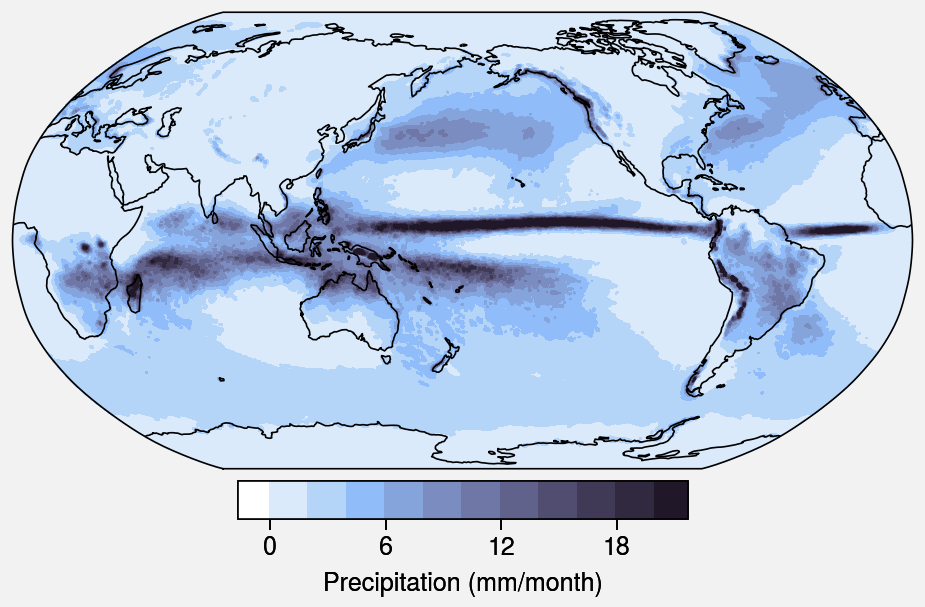

In [20]:
fig, ax = plot.subplots(axwidth=4.5, tight=True,
                        proj='robin', proj_kw={'lon_0': 180},)
# format options
ax.format(land=False, coast=True, innerborders=False, borders=False,
          labels=True, geogridlinewidth=0,)

map1 = ax.contourf(ds['LON'], ds['LAT'],
                   ds['PRECIP'][0, :, :],
                   cmap='Dusk',
                   levels=plot.arange(0, 20, 2),
                   extend='both')

ax.colorbar(map1, loc='b', shrink=0.5, extendrect=True, label='Precipitation (mm/month)')
fig.save('PD_precipitation.jpeg')
plt.show()

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import xarray as xr 
import pandas as pd
import seaborn as sns
import iris
import iris.plot as iplt
import iris.quickplot as qplt



from esmtools.stats import*

warnings.filterwarnings('ignore')
 

In [22]:

cubes = iris.load('/Users/monsoon/Desktop/may-2020/data/PD/PHIS.ymonmean.0121-0140.nc')
data = cubes[0]
# Transform it to a long format

In [23]:
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime
import netCDF4
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


In [24]:
data_dir = ('/Users/monsoon/Desktop/may-2020/data/PD/PRECIP.ymonmean.0121-0140.nc')
ds = xr.open_dataset(data_dir,decode_times=False)

In [25]:
ds.PRECIP[:100,0,0]==np.nan


<xarray.DataArray 'PRECIP' (TIME: 12)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False])
Coordinates:
    LON      float64 0.0
    LAT      float64 -90.0
  * TIME     (TIME) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0

In [26]:
ds.PRECIP.values


array([[[0.11832701, 0.11832701, 0.11832701, ..., 0.11832701,
         0.11832701, 0.11832701],
        [0.10979286, 0.10977795, 0.10976317, ..., 0.1098742 ,
         0.10984693, 0.10981983],
        [0.10469563, 0.10466579, 0.10463625, ..., 0.10485829,
         0.10480377, 0.10474955],
        ...,
        [0.61499114, 0.61499207, 0.61499232, ..., 0.6151108 ,
         0.61507157, 0.61503168],
        [0.60377374, 0.60377423, 0.60377433, ..., 0.60383359,
         0.60381397, 0.60379405],
        [0.59989366, 0.59989366, 0.59989366, ..., 0.59989366,
         0.59989366, 0.59989366]],

       [[0.2184394 , 0.2184394 , 0.2184394 , ..., 0.2184394 ,
         0.2184394 , 0.2184394 ],
        [0.20211119, 0.20206586, 0.20202083, ..., 0.20226801,
         0.20221542, 0.20216316],
        [0.1914498 , 0.19135909, 0.19126904, ..., 0.19176341,
         0.19165824, 0.1915537 ],
        ...,
        [0.61062336, 0.61062356, 0.61062249, ..., 0.61053019,
         0.61056253, 0.6105936 ],
        [0.5

In [27]:
ds

<xarray.Dataset>
Dimensions:   (LAT: 768, LON: 1152, TIME: 12, bnds: 2)
Coordinates:
  * LON       (LON) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * LAT       (LAT) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * TIME      (TIME) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0
Dimensions without coordinates: bnds
Data variables:
    LON_bnds  (LON, bnds) float64 ...
    LAT_bnds  (LAT, bnds) float64 ...
    PRECIP    (TIME, LAT, LON) float64 0.1183 0.1183 0.1183 ... 0.7702 0.7702
Attributes:
    history:      PyFerret V7.5 (optimized)  7-Jun-20
    Conventions:  CF-1.6

In [28]:
ds.PRECIP.data

array([[[0.11832701, 0.11832701, 0.11832701, ..., 0.11832701,
         0.11832701, 0.11832701],
        [0.10979286, 0.10977795, 0.10976317, ..., 0.1098742 ,
         0.10984693, 0.10981983],
        [0.10469563, 0.10466579, 0.10463625, ..., 0.10485829,
         0.10480377, 0.10474955],
        ...,
        [0.61499114, 0.61499207, 0.61499232, ..., 0.6151108 ,
         0.61507157, 0.61503168],
        [0.60377374, 0.60377423, 0.60377433, ..., 0.60383359,
         0.60381397, 0.60379405],
        [0.59989366, 0.59989366, 0.59989366, ..., 0.59989366,
         0.59989366, 0.59989366]],

       [[0.2184394 , 0.2184394 , 0.2184394 , ..., 0.2184394 ,
         0.2184394 , 0.2184394 ],
        [0.20211119, 0.20206586, 0.20202083, ..., 0.20226801,
         0.20221542, 0.20216316],
        [0.1914498 , 0.19135909, 0.19126904, ..., 0.19176341,
         0.19165824, 0.1915537 ],
        ...,
        [0.61062336, 0.61062356, 0.61062249, ..., 0.61053019,
         0.61056253, 0.6105936 ],
        [0.5

In [29]:
ds.PRECIP.dims


('TIME', 'LAT', 'LON')

In [30]:
type(ds.PRECIP.values)


numpy.ndarray

In [31]:
ds.PRECIP.values.shape

(12, 768, 1152)

In [32]:
ds.PRECIP.dims[0]


'TIME'

In [33]:
ds.TIME.attrs


{'long_name': 'time',
 'units': 'months since 0001-01-15 00',
 'calendar': '365_day',
 'axis': 'T',
 'modulo': 12.0,
 'standard_name': 'time'}

In [34]:
ds.TIME

<xarray.DataArray 'TIME' (TIME: 12)>
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])
Coordinates:
  * TIME     (TIME) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0
Attributes:
    long_name:      time
    units:          months since 0001-01-15 00
    calendar:       365_day
    axis:           T
    modulo:         12.0
    standard_name:  time

In [35]:
ds.info()

xarray.Dataset {
dimensions:
	LAT = 768 ;
	LON = 1152 ;
	TIME = 12 ;
	bnds = 2 ;

variables:
	float64 LON(LON) ;
		LON:long_name = Longitude ;
		LON:units = degrees_east ;
		LON:axis = X ;
		LON:bounds = LON_bnds ;
		LON:modulo = 360.0 ;
		LON:point_spacing = uneven ;
		LON:standard_name = longitude ;
	float64 LON_bnds(LON, bnds) ;
	float64 LAT(LAT) ;
		LAT:long_name = Latitude ;
		LAT:units = degrees_north ;
		LAT:axis = Y ;
		LAT:bounds = LAT_bnds ;
		LAT:point_spacing = uneven ;
		LAT:standard_name = latitude ;
	float64 LAT_bnds(LAT, bnds) ;
	float64 TIME(TIME) ;
		TIME:long_name = time ;
		TIME:units = months since 0001-01-15 00 ;
		TIME:calendar = 365_day ;
		TIME:axis = T ;
		TIME:modulo = 12.0 ;
		TIME:standard_name = time ;
	float64 PRECIP(TIME, LAT, LON) ;
		PRECIP:long_name = precipitation ;
		PRECIP:units = mm/day ;

// global attributes:
	:history = PyFerret V7.5 (optimized)  7-Jun-20 ;
	:Conventions = CF-1.6 ;
}

In [36]:
rain = ds.PRECIP.mean(dim='TIME')

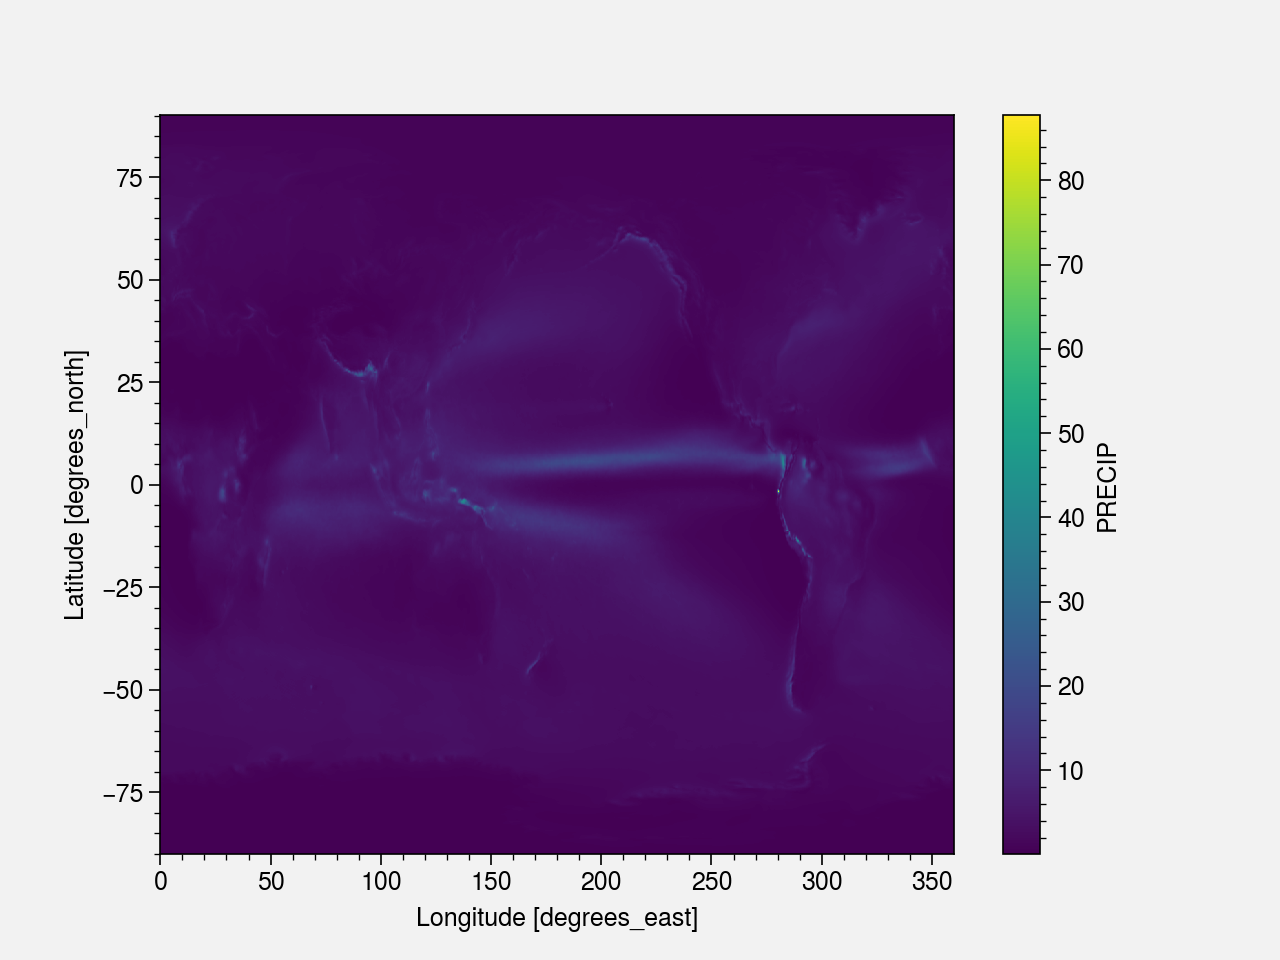

In [37]:
rain.plot();

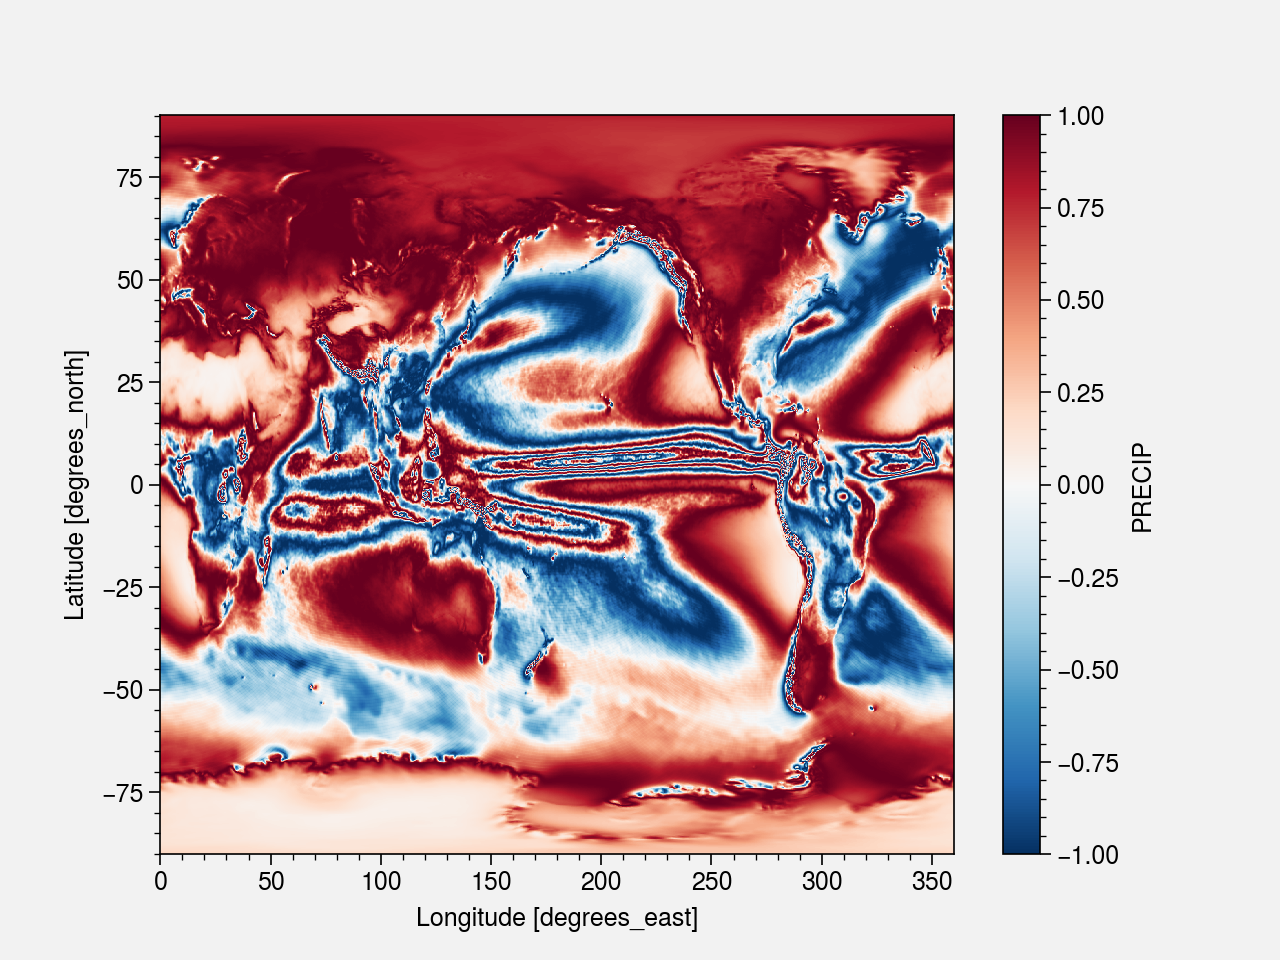

In [38]:
np.sin(rain).plot();


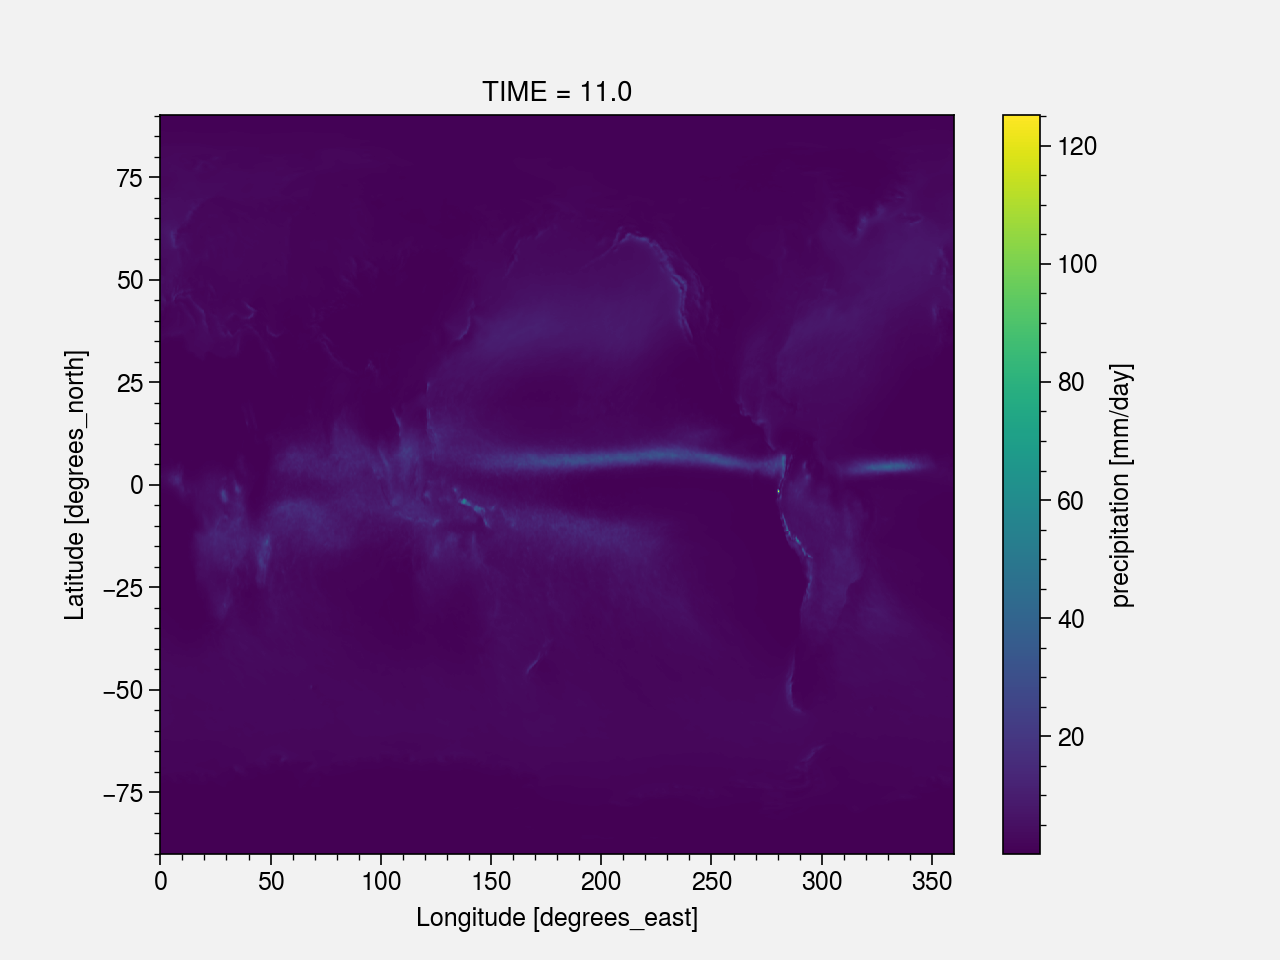

In [39]:
ds.PRECIP.sel(TIME='11').plot();

In [40]:
ds.PRECIP.attrs


{'long_name': 'precipitation', 'units': 'mm/day'}

In [41]:
ds.PRECIP[:, 1, 2]


<xarray.DataArray 'PRECIP' (TIME: 12)>
array([0.109763, 0.202021, 0.265505, 0.345751, 0.282532, 0.244721, 0.201691,
       0.209479, 0.226949, 0.241503, 0.181924, 0.107038])
Coordinates:
    LON      float64 0.625
    LAT      float64 -89.77
  * TIME     (TIME) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0
Attributes:
    long_name:  precipitation
    units:      mm/day

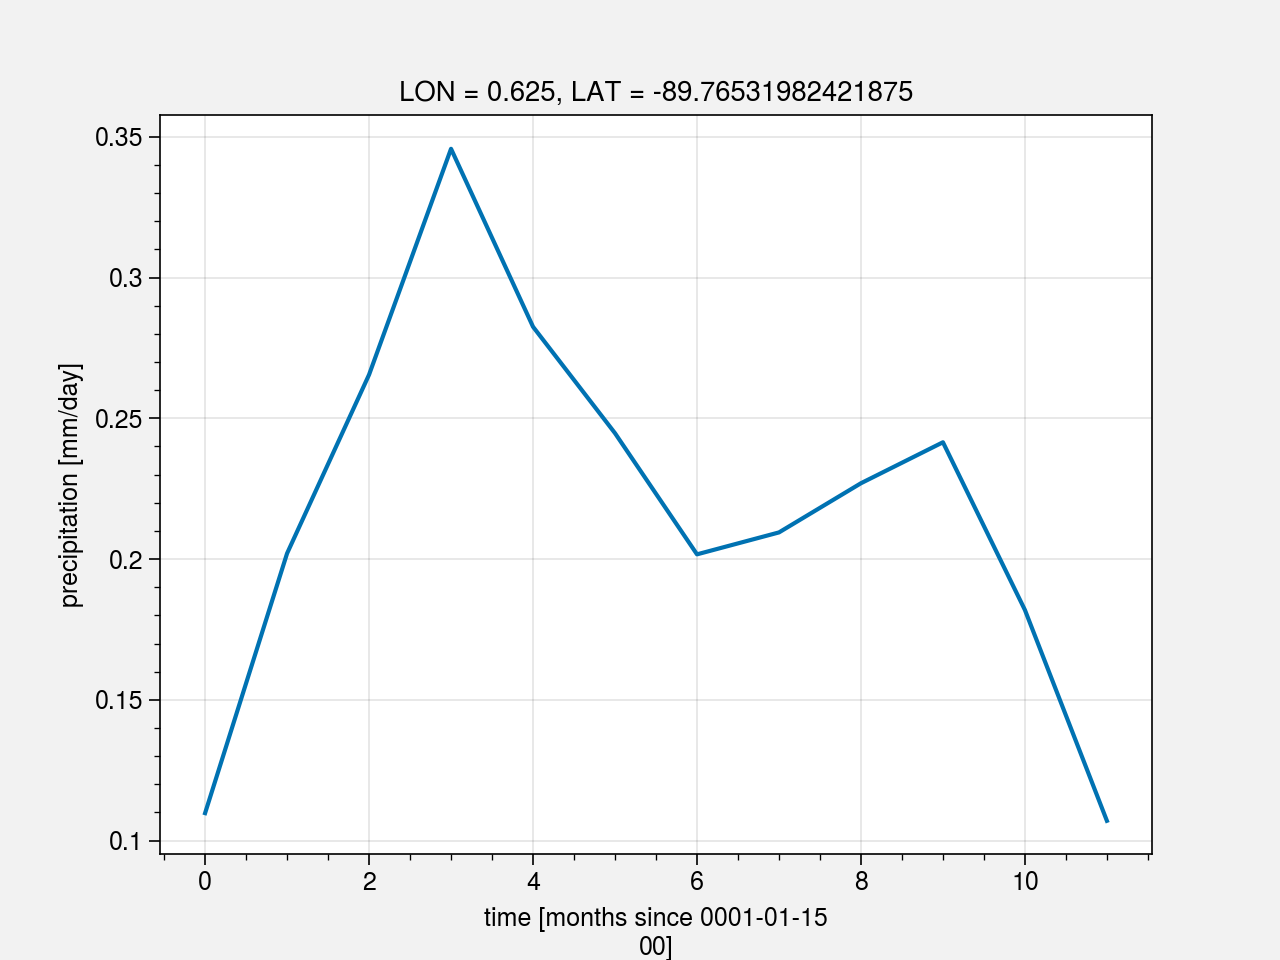

In [42]:
ds.PRECIP[:, 1, 2].plot();


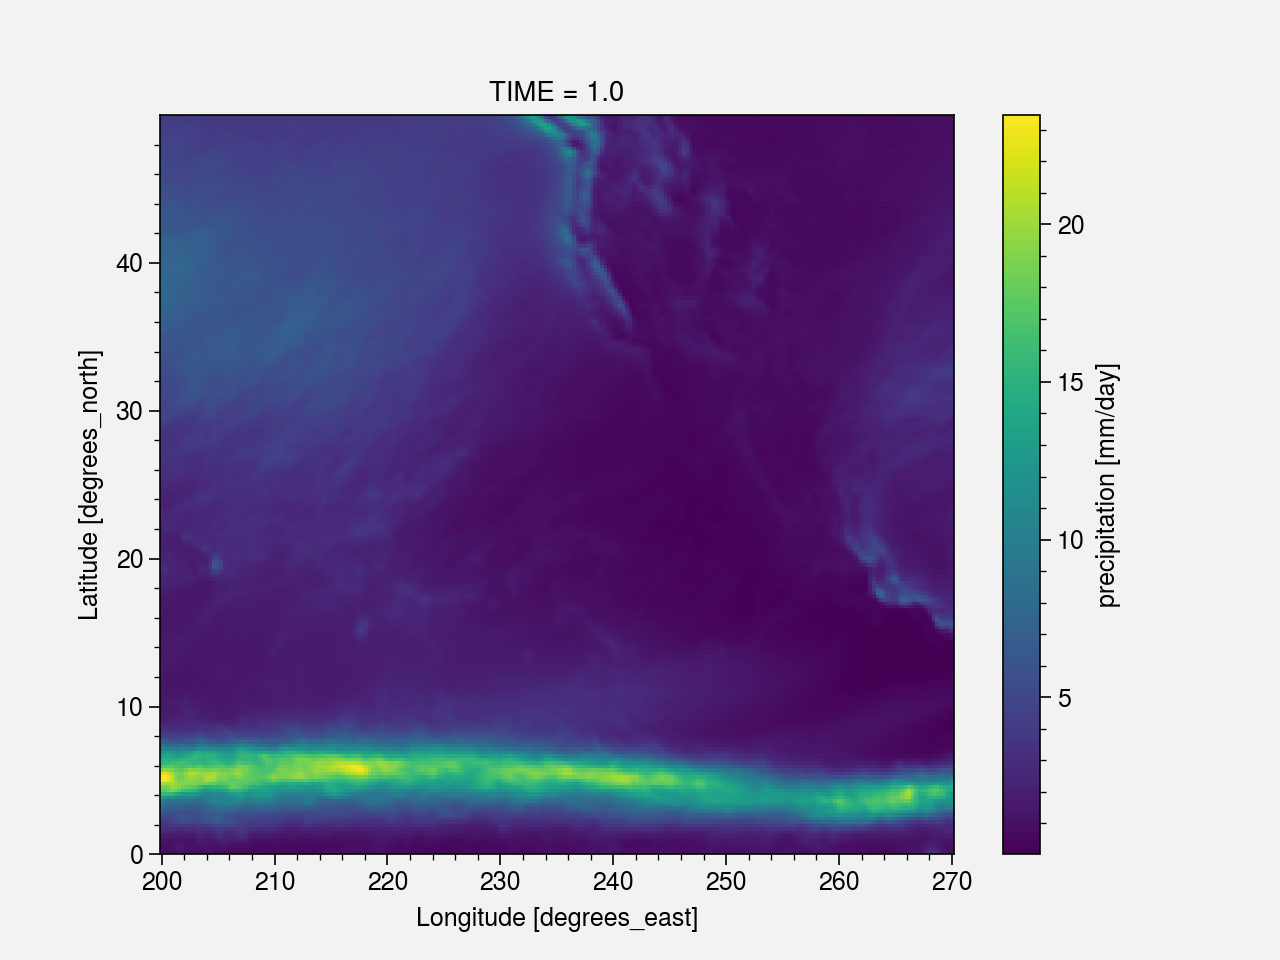

In [43]:
ds.PRECIP.sel(LAT=slice(0, 50), LON=slice(200, 270), TIME=1).plot()


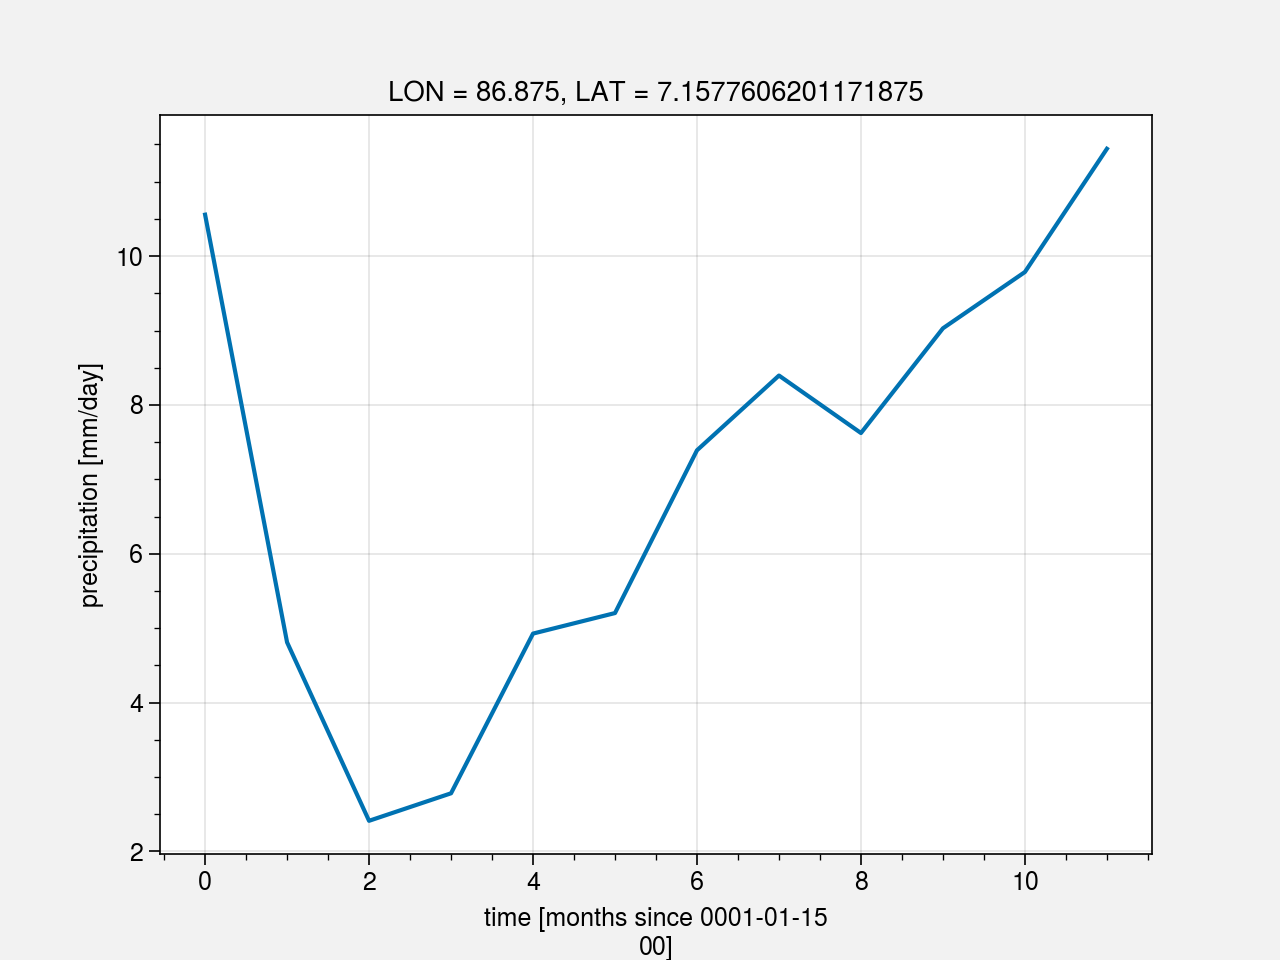

In [44]:
ds.PRECIP.sel(LAT=7.2, LON=87, method='nearest', tolerance=5).plot()


In [45]:
t_average = ds.PRECIP.mean(dim='TIME')

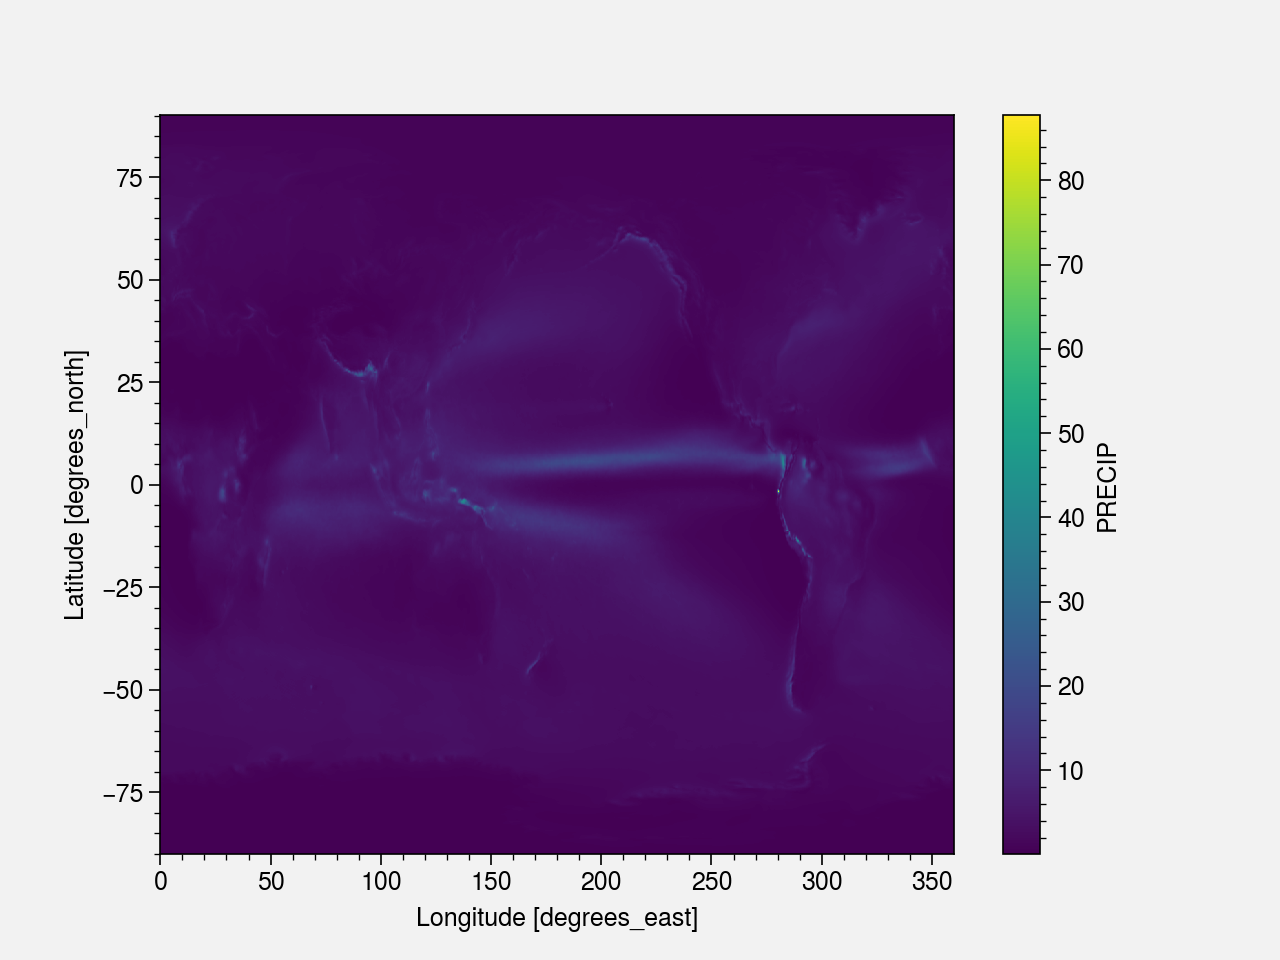

In [46]:
t_average.plot();

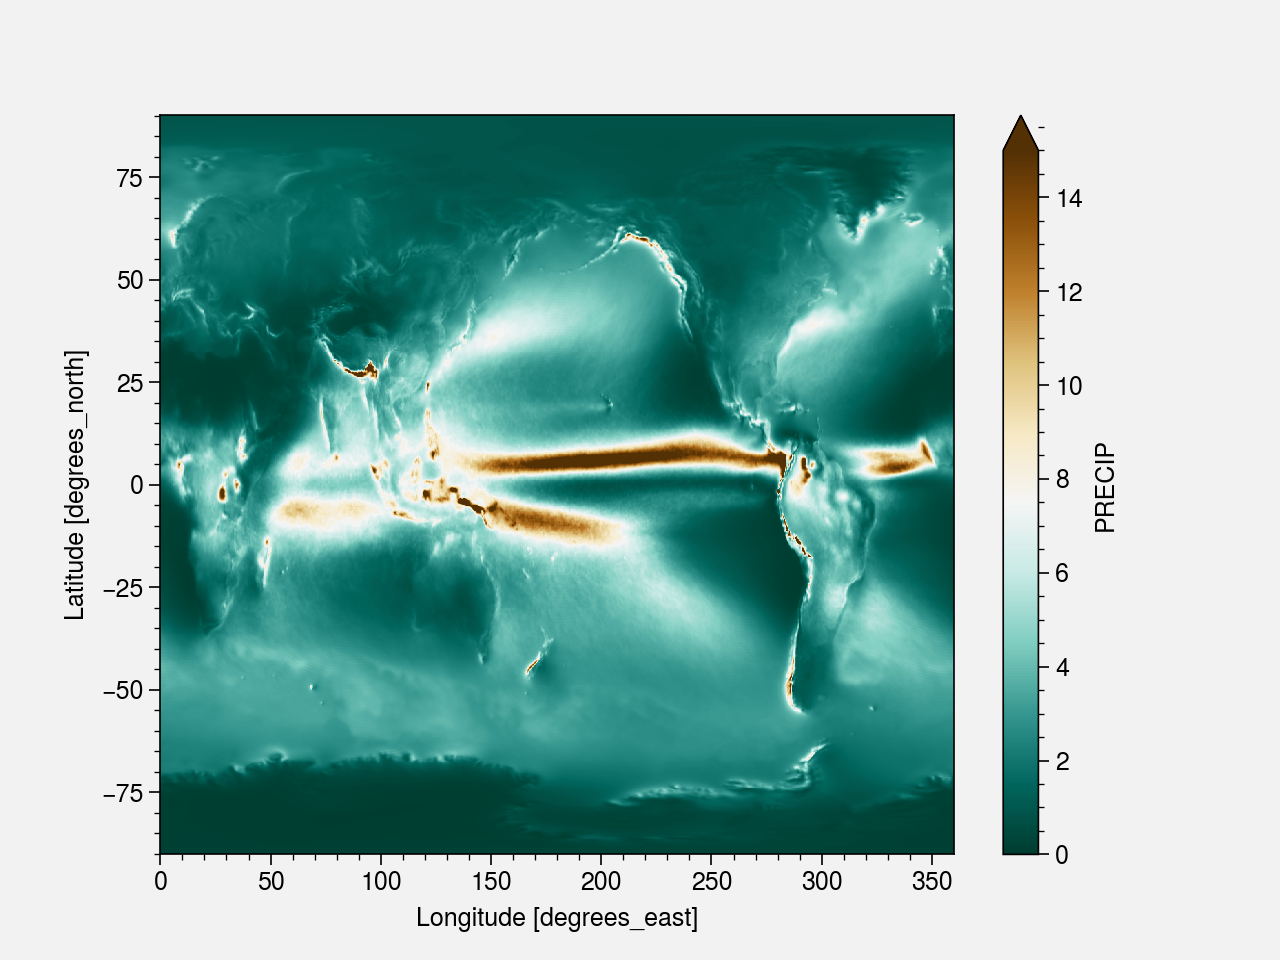

In [47]:
t_average.plot(cmap='BrBG_r',vmin=0, vmax=15);

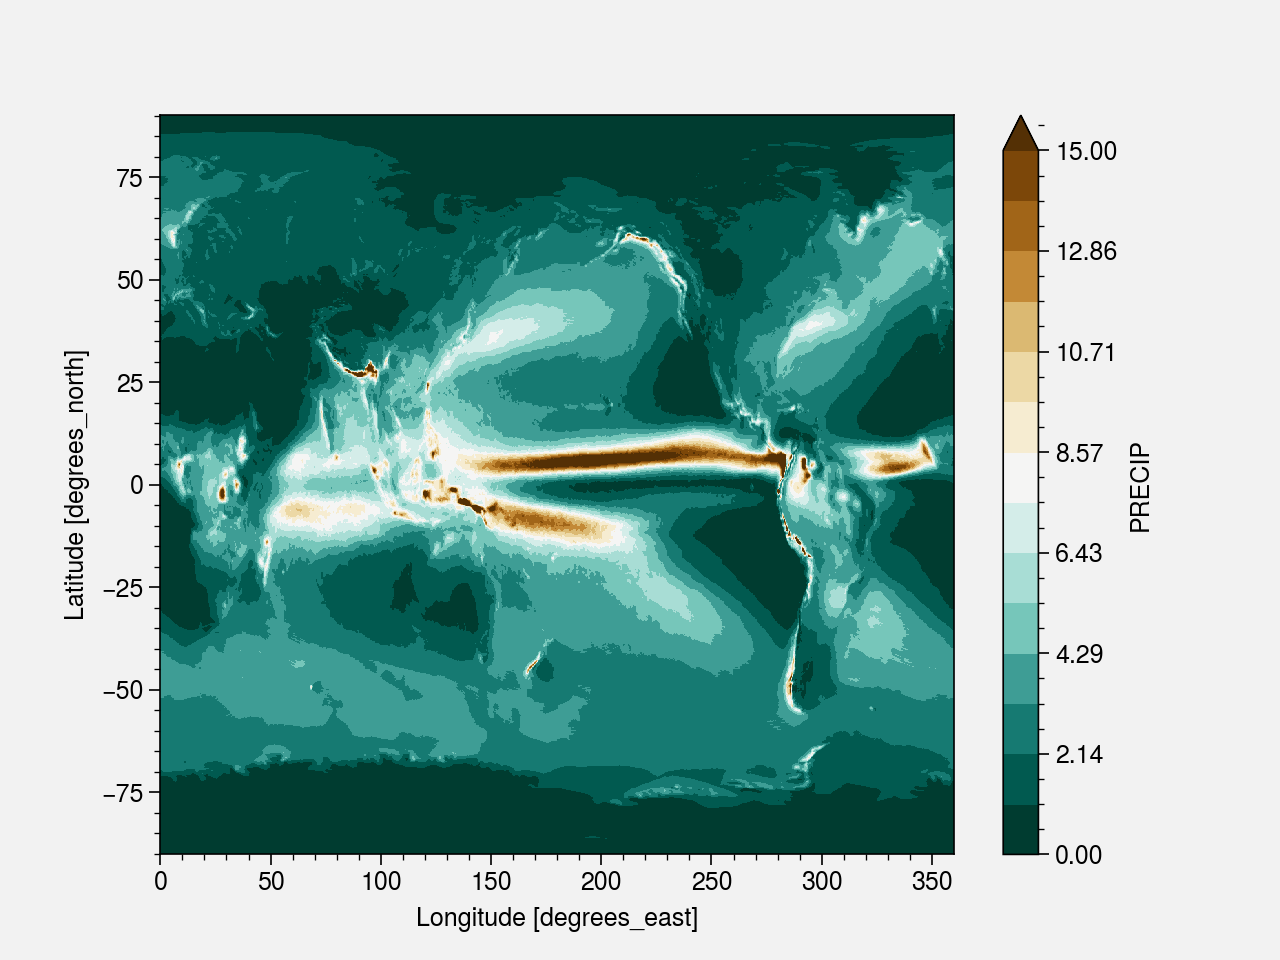

In [48]:
t_average.plot(cmap='BrBG_r', vmin=0, vmax=15,levels=15, center=False);


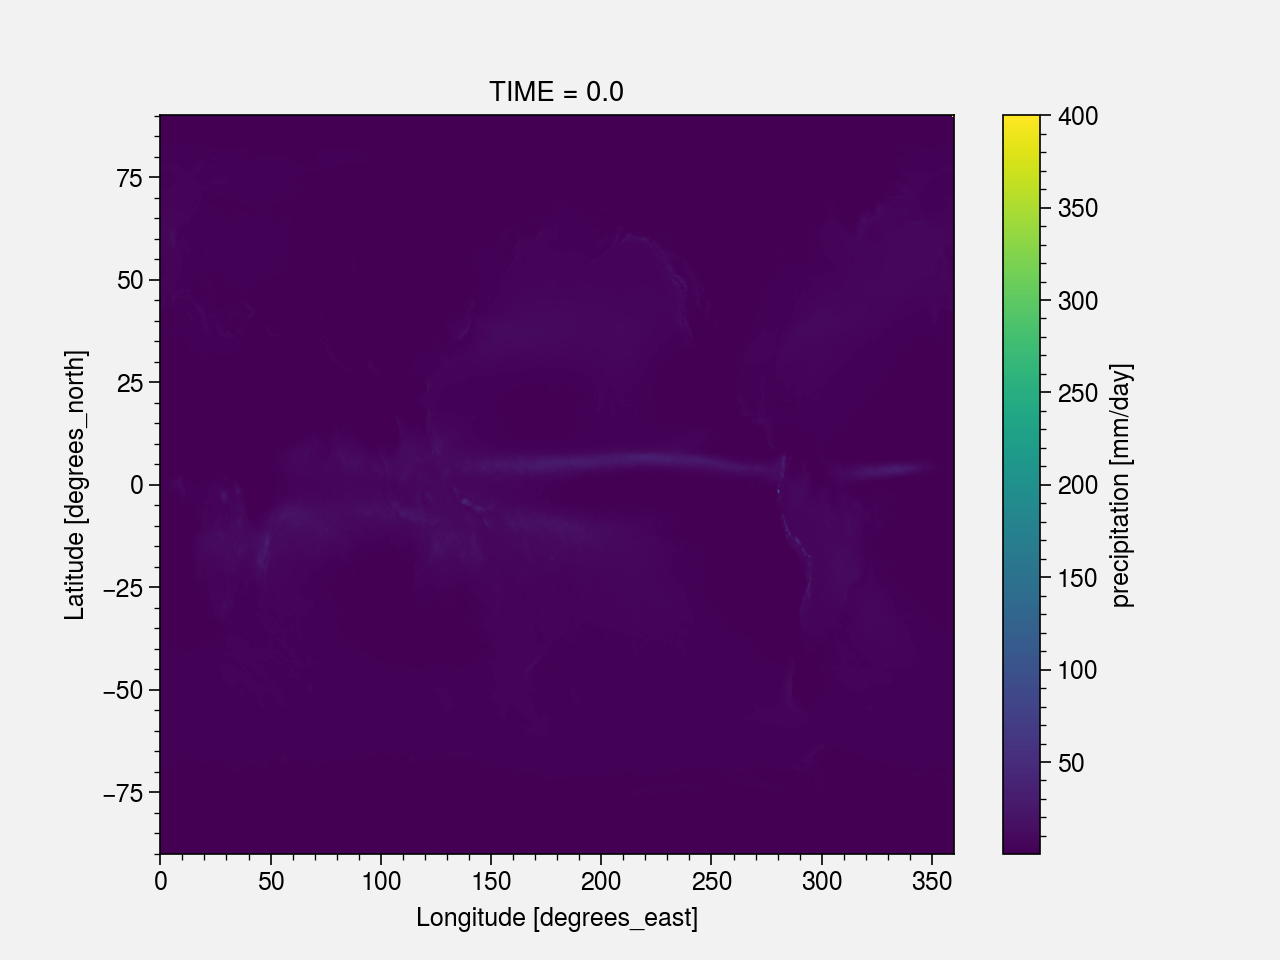

In [49]:
outliers = ds.PRECIP.isel(TIME=0).copy()
outliers[0, 0] = 100
outliers[-1, -1] = 400
outliers.plot(); # outliers mess with the datarange and colorscale!

In [51]:
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

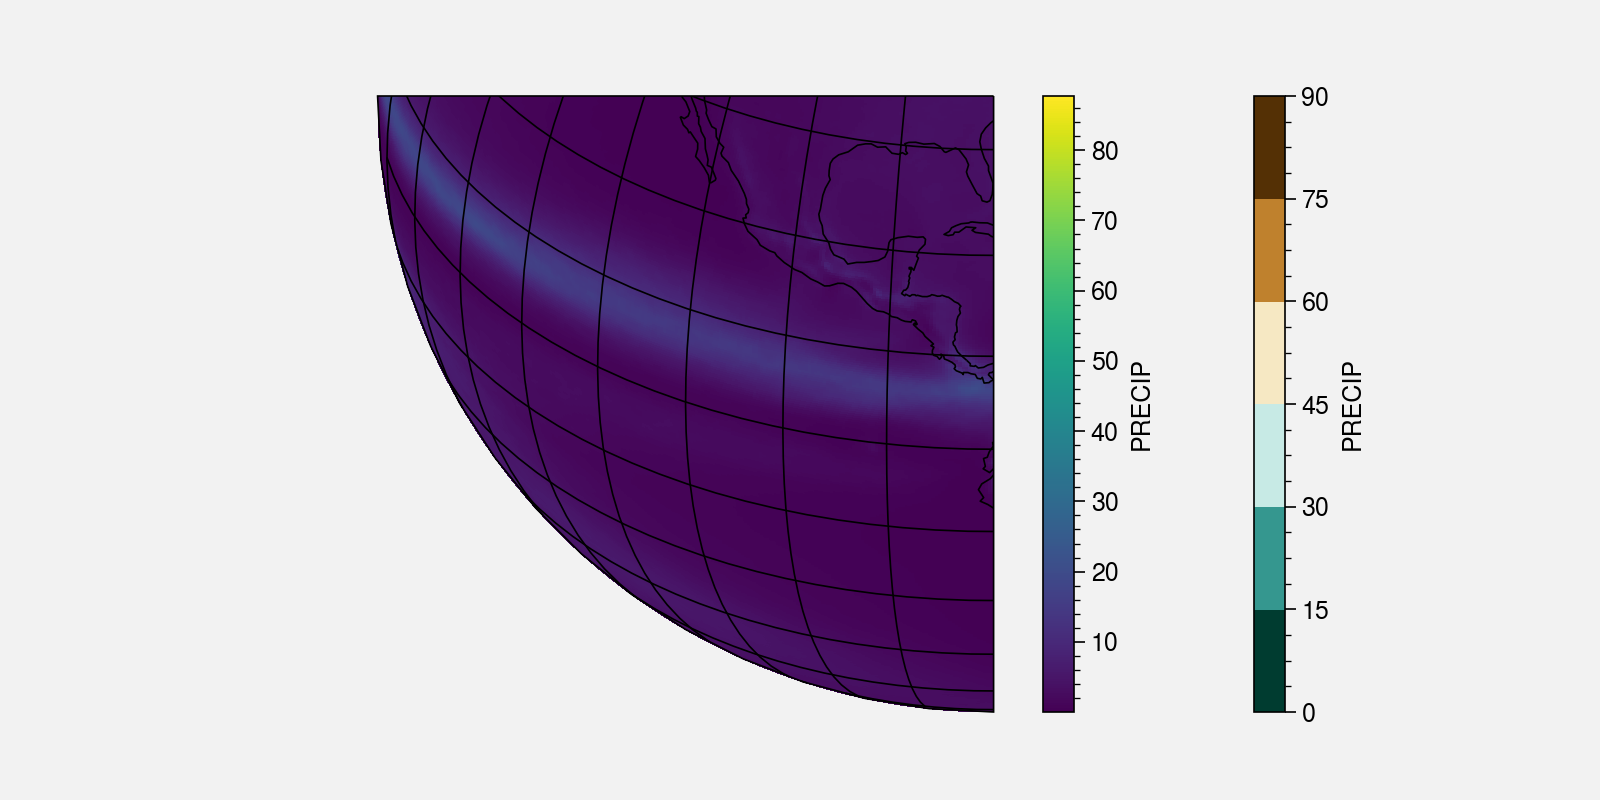

In [55]:
f = plt.figure(figsize=(8, 4))

# Define the map projection *on which* you want to plot
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))

# ax is an empty plot. We now plot the variable t_average onto ax
# the keyword "transform" tells the function in which projection the air temp data is stored

t_average.plot.contourf(cmap='BrBG_r', center=False);
t_average.plot(ax=ax, transform=ccrs.PlateCarree())



# Add gridlines and coastlines to the plot
ax.coastlines(); ax.gridlines();
